In [2]:
import openai
from openai.embeddings_utils import cosine_similarity
import pandas as pd
import numpy as np
import os
from __future__ import division
from scipy.stats import ttest_ind
import itertools
import matplotlib.pyplot as plt


In [35]:
def simtoavg_rating_bar(df, asin):
    
    rating_simtoavgs = []
    
    for r in 1.0, 2.0, 3.0, 4.0, 5.0:

        subset_df = df[(df['asin']==asin) & (df['overall']==r)]
        
        embeddings = subset_df['embedding'].apply(lambda x: np.array(x))
        embeddings = embeddings.to_numpy()
        average_embedding = np.mean(embeddings, axis=0)
        
        simtoavgs = []
        for e in embeddings:
            simtoavgs.append(cosine_similarity(e, average_embedding))
        
        rating_simtoavgs.append(np.mean(simtoavgs))
    
    plt_df = pd.DataFrame({'rating':['1', '2', '3', '4', '5'], 'val':rating_simtoavgs})
    
    title = asin + ', Similarity to Average'
    ax = plt_df.plot.bar(x='rating', y='val', title=title, rot=0, legend=False)
    ax.bar_label(ax.containers[0])
    plt.xlabel('Rating')
    plt.ylabel('Mean Cosine Similarity')    
    plt.savefig('sim_to_avg_by_rating_bar/experience/' + asin + '.png')
    
    plt.show()




In [36]:
def pairwisesim_rating_bar(df, asin):
    
    rating_pairsims = []
    
    for r in 1.0, 2.0, 3.0, 4.0, 5.0:

        subset_df = df[(df['asin']==asin) & (df['overall']==r)]
        
        embeddings = subset_df['embedding'].apply(lambda x: np.array(x))
        embeddings = embeddings.to_numpy()
 
        pairs = list(itertools.combinations(embeddings, 2))

        pairsims = []
        for p in pairs:
            pairsims.append(cosine_similarity(p[0], p[1]))
        
        rating_pairsims.append(np.mean(pairsims))
    
    plt_df = pd.DataFrame({'rating':['1', '2', '3', '4', '5'], 'val':rating_pairsims})
    
    title = asin + ', Pairwise Similarity'
    ax = plt_df.plot.bar(x='rating', y='val', title=title, rot=0, legend=False)
    ax.bar_label(ax.containers[0])
    plt.xlabel('Rating')
    plt.ylabel('Mean Cosine Similarity')  
    ax.bar_label(ax.containers[0])

    plt.savefig('pairwise_sim_by_rating_bar/experience/' + asin + '.png')
    
    plt.show()

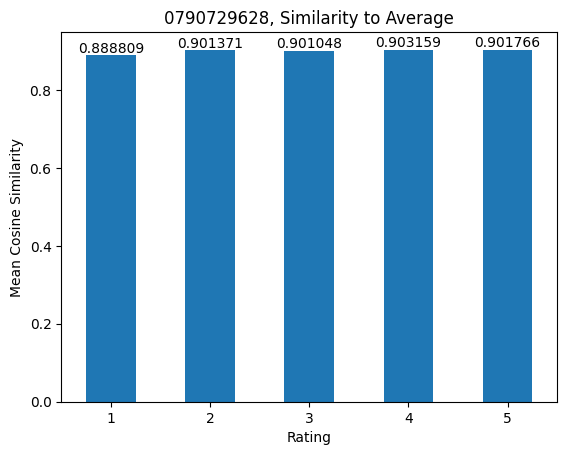

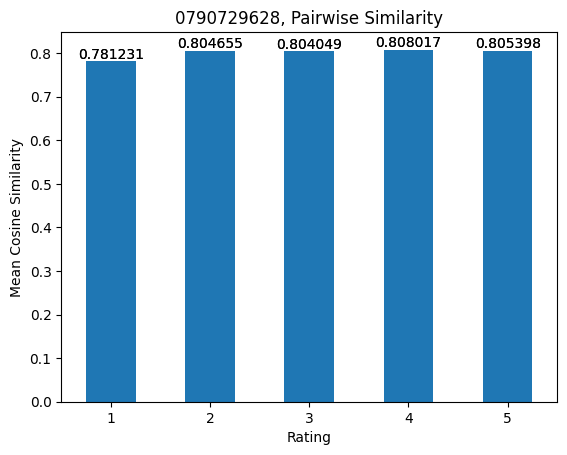

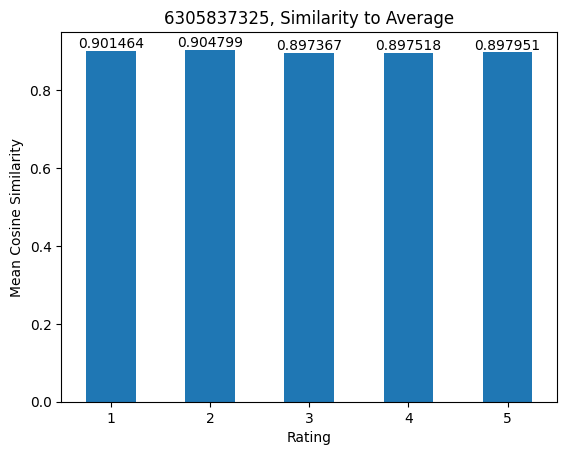

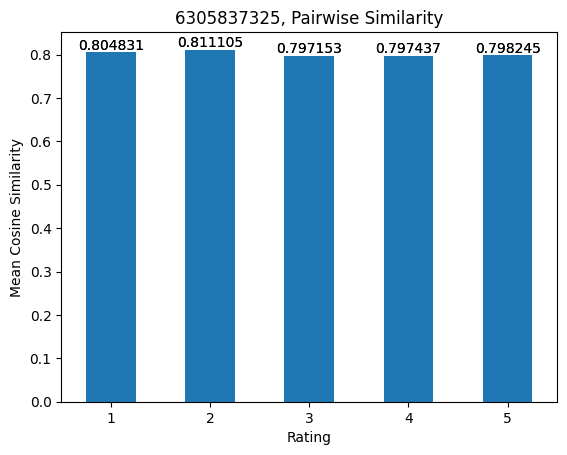

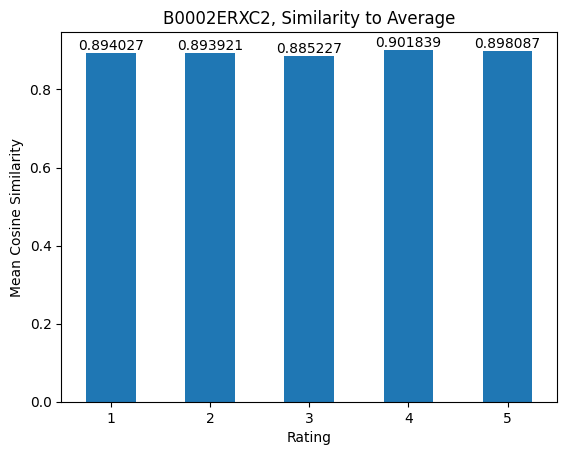

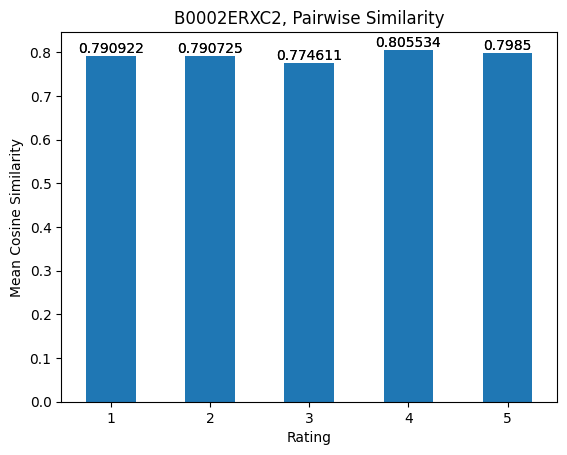

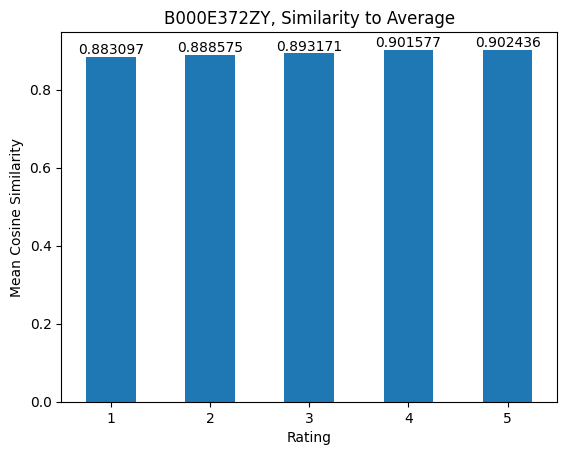

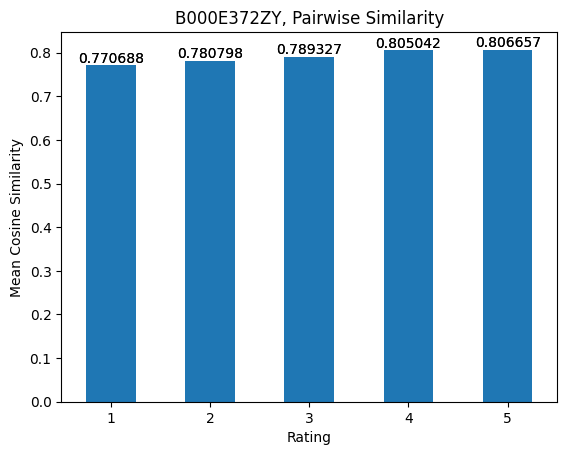

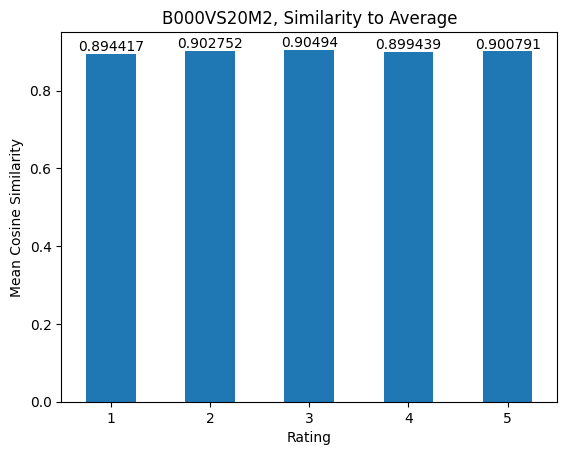

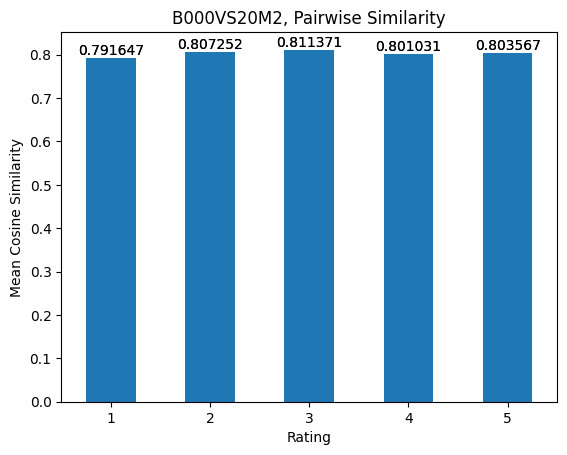

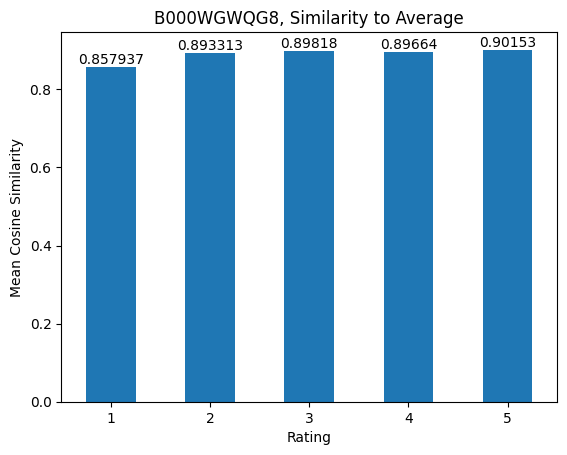

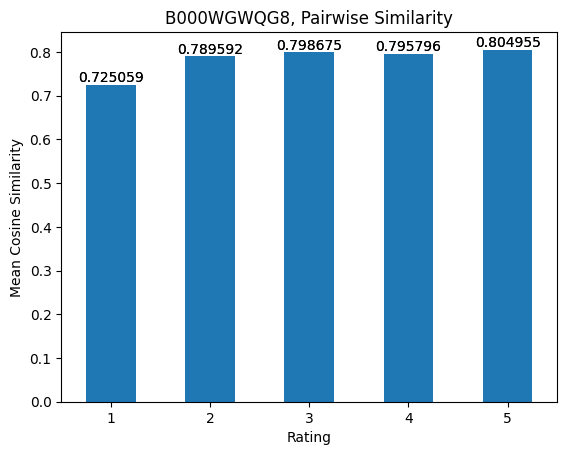

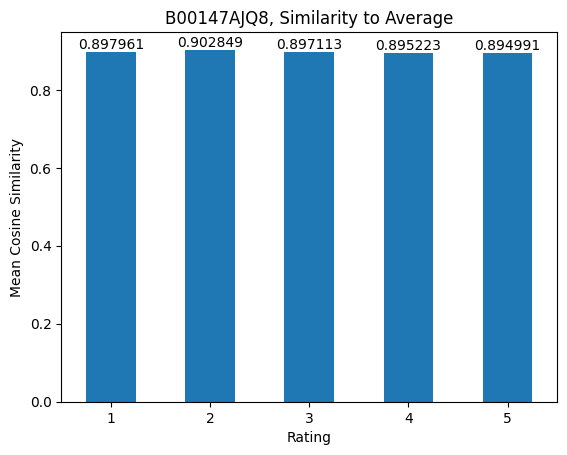

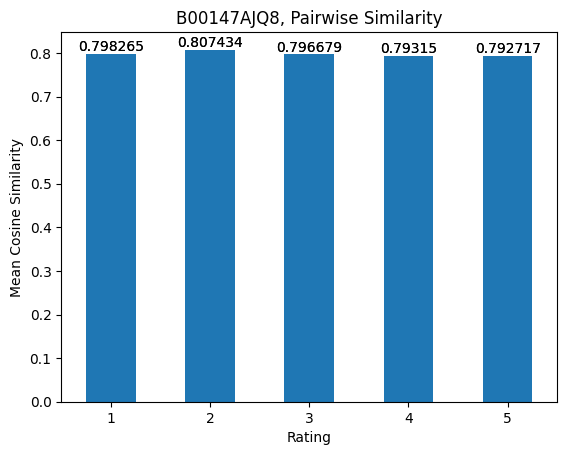

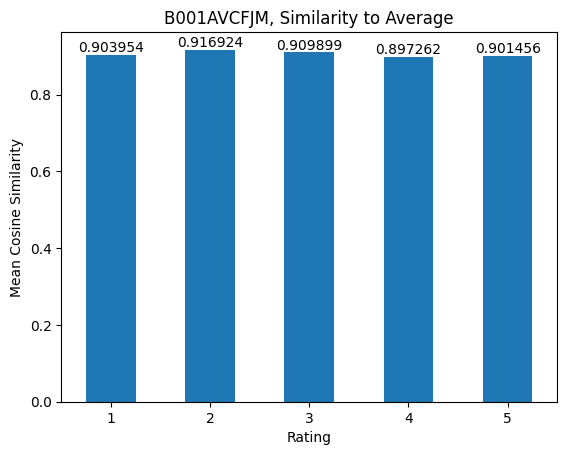

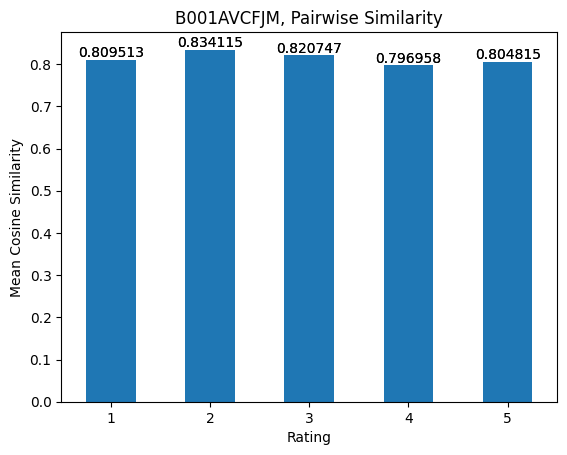

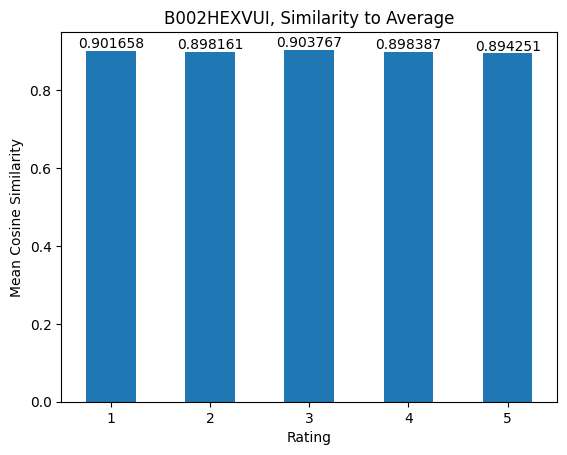

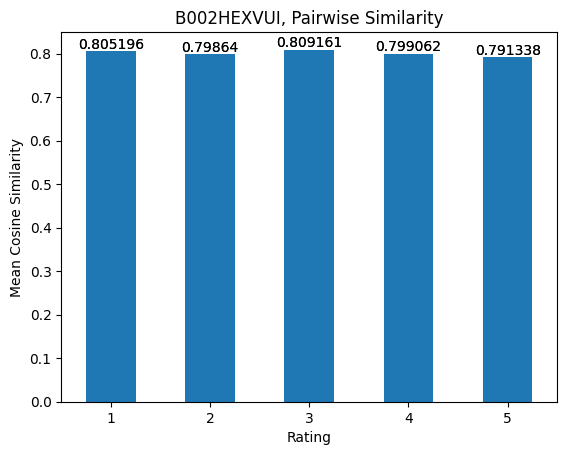

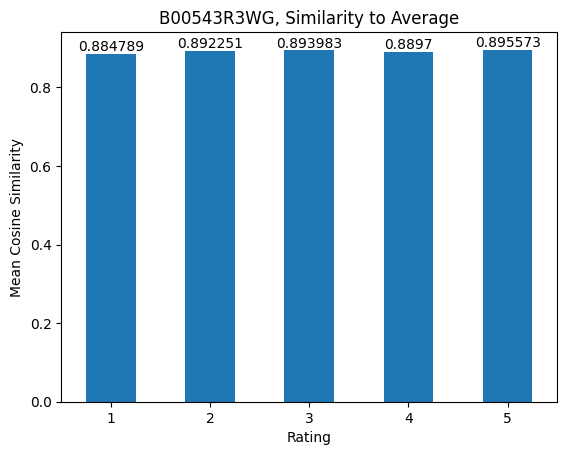

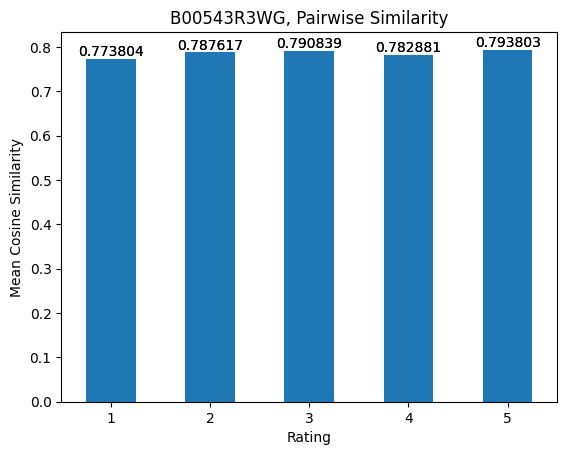

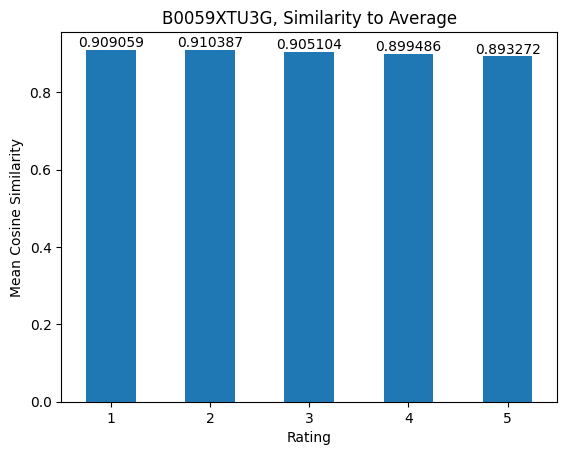

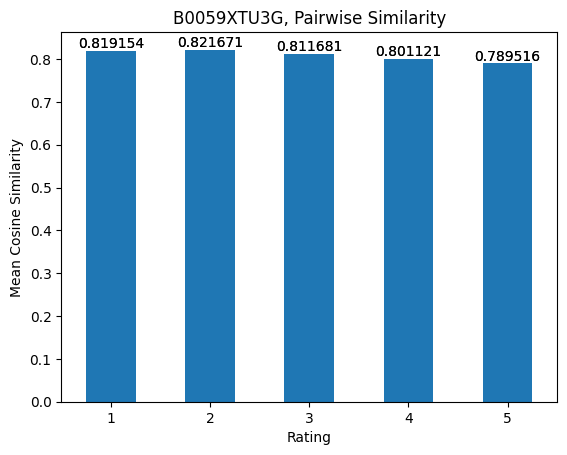

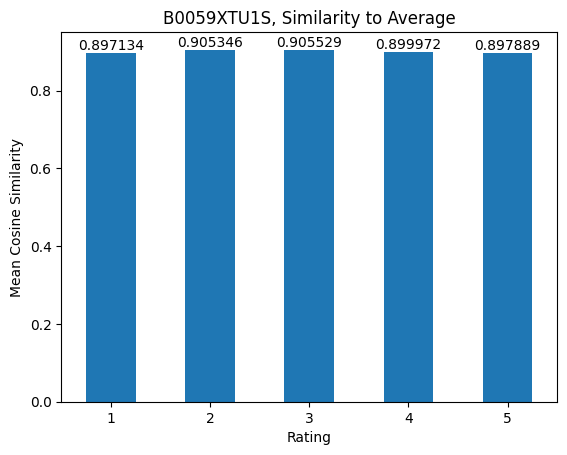

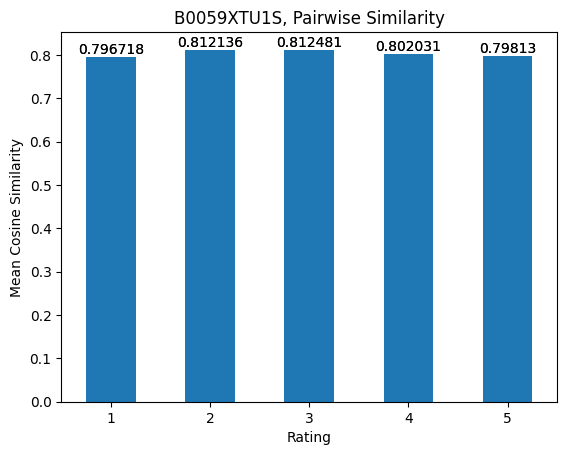

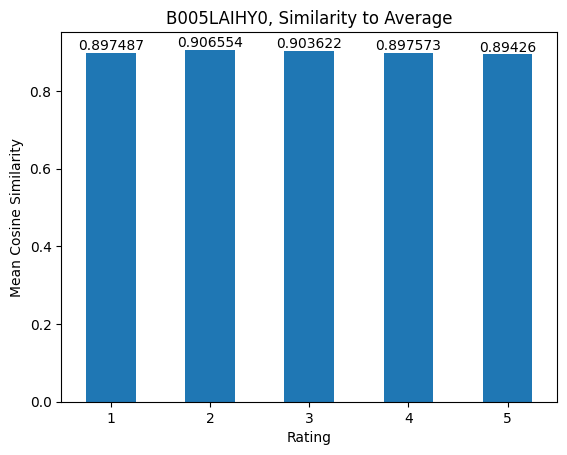

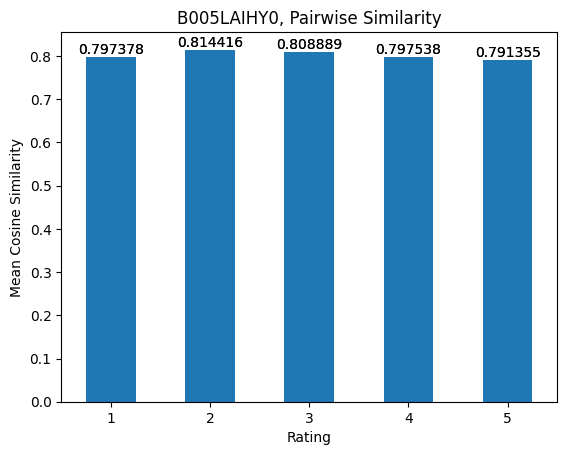

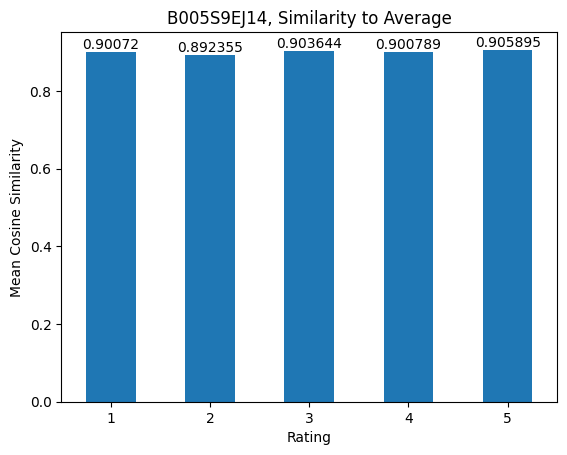

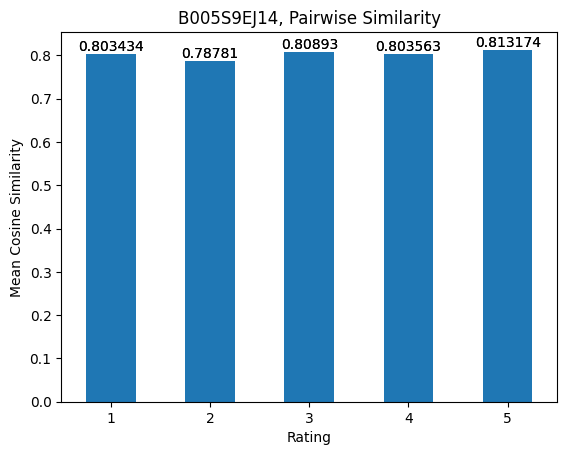

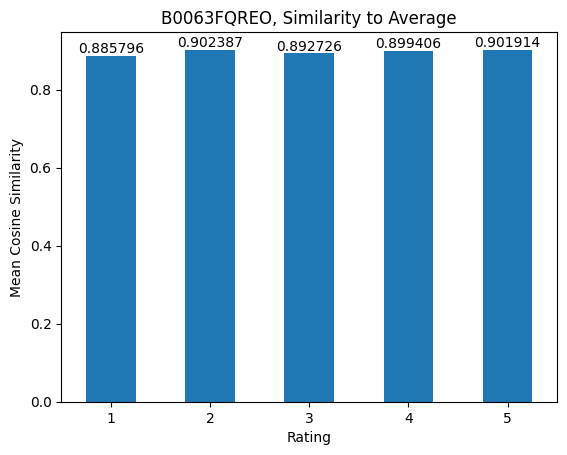

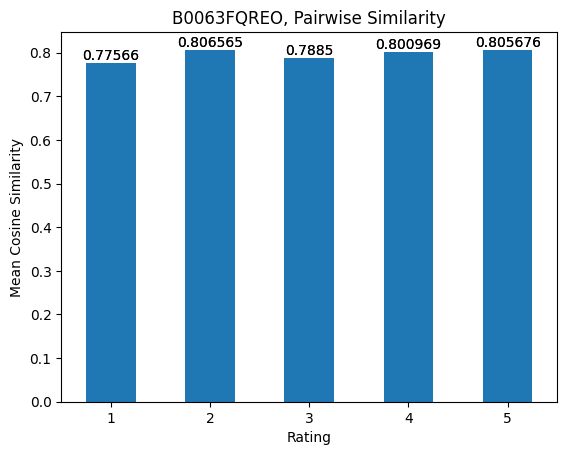

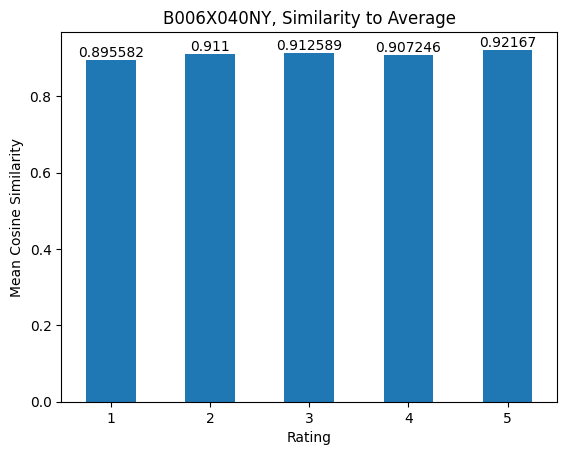

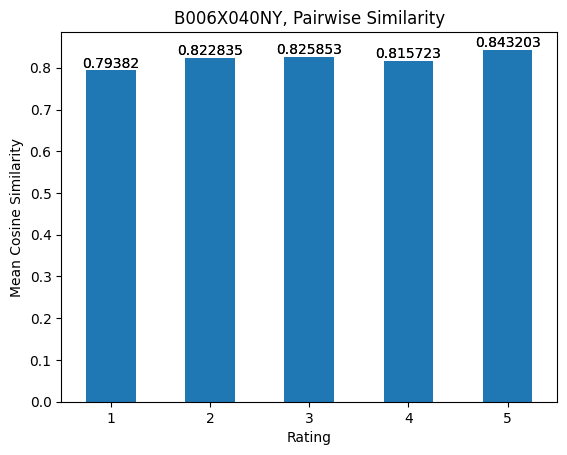

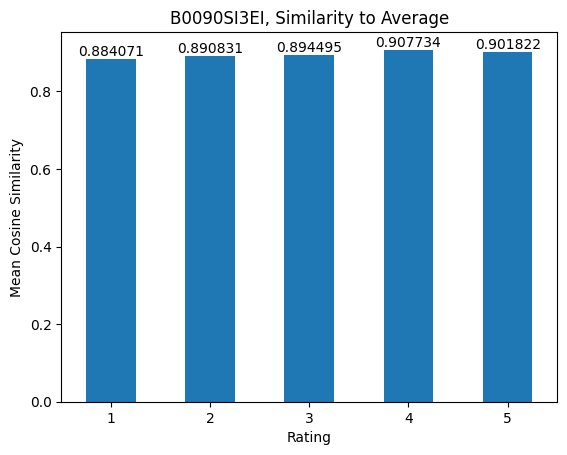

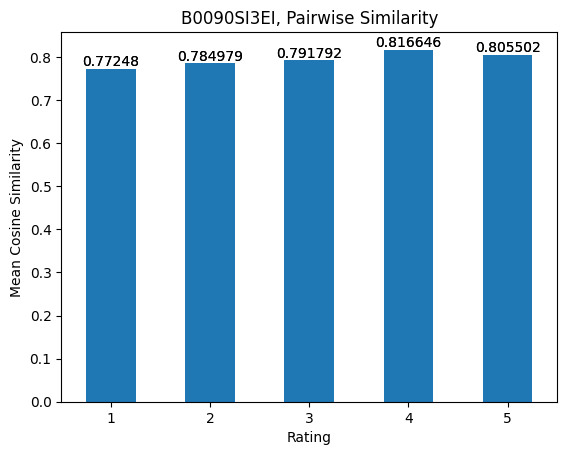

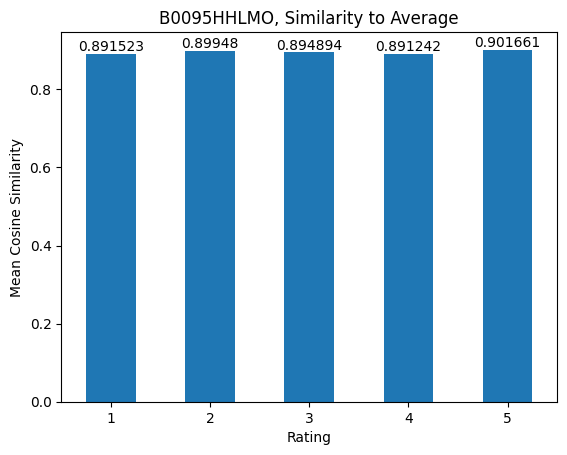

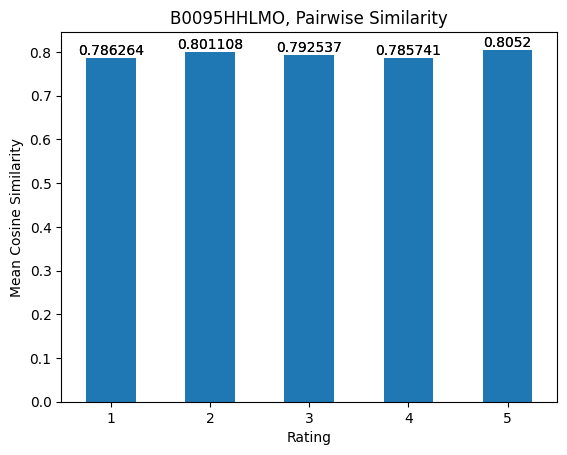

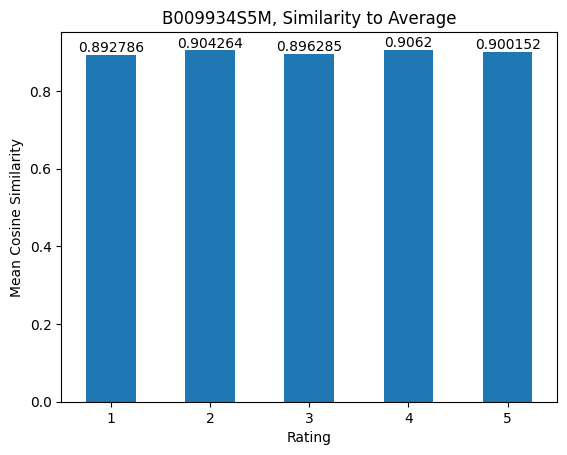

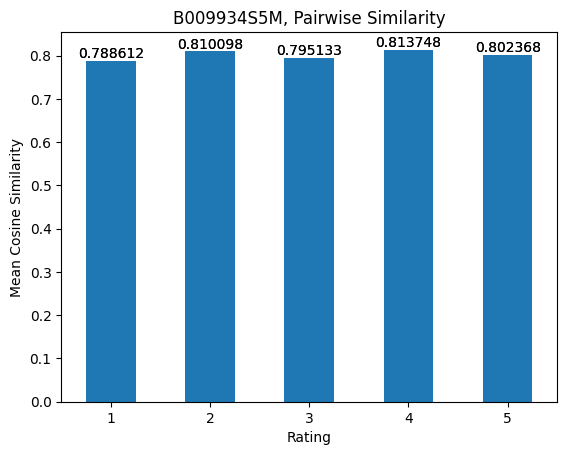

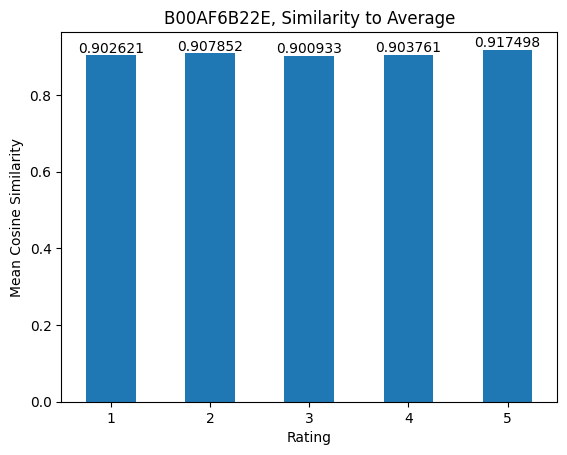

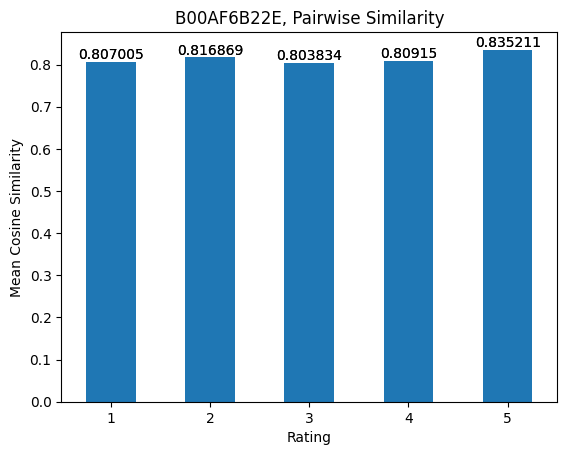

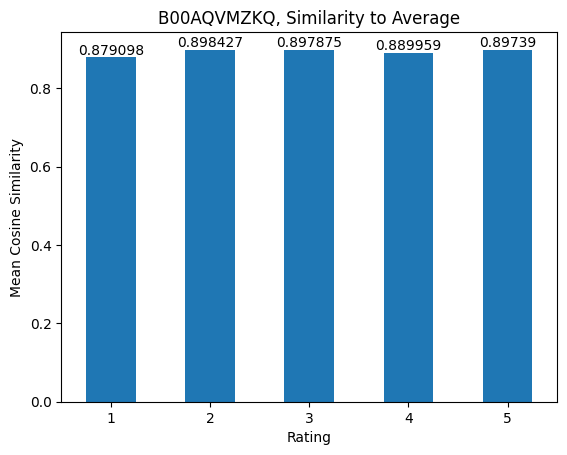

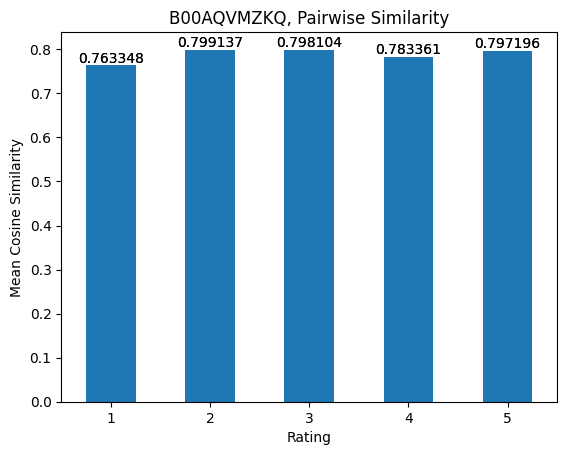

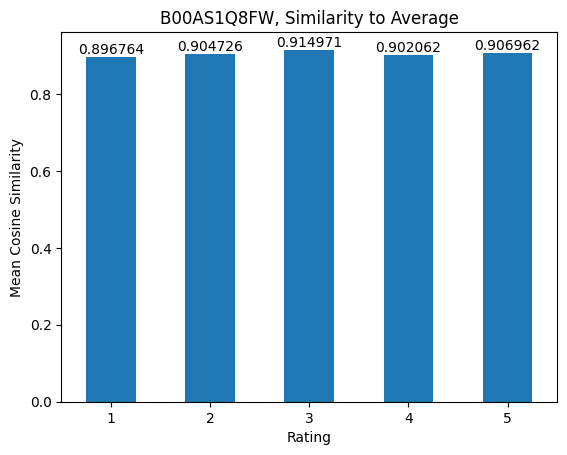

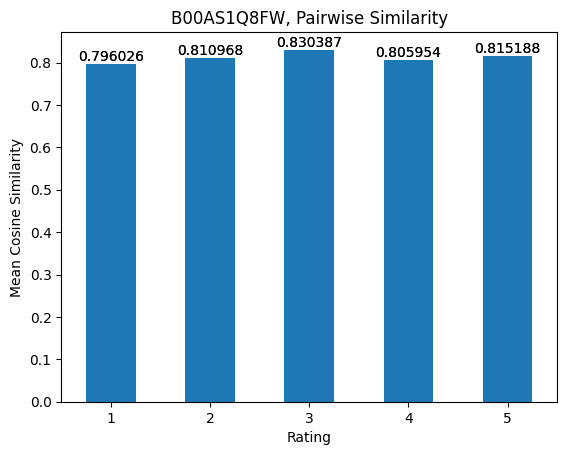

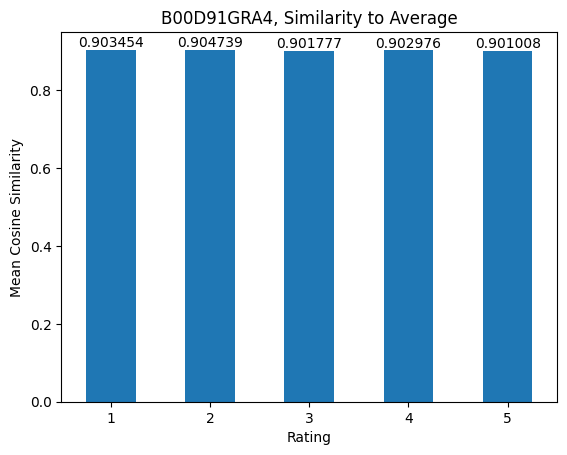

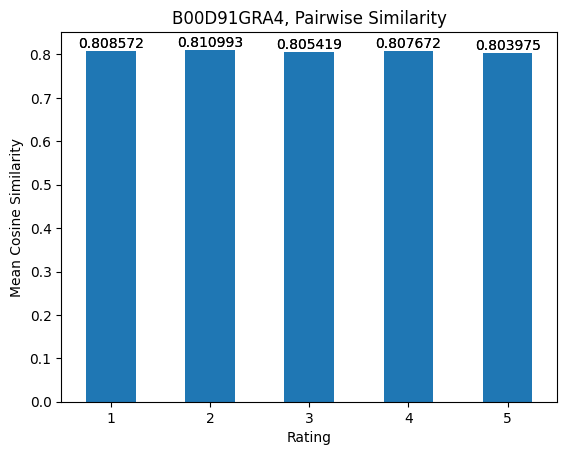

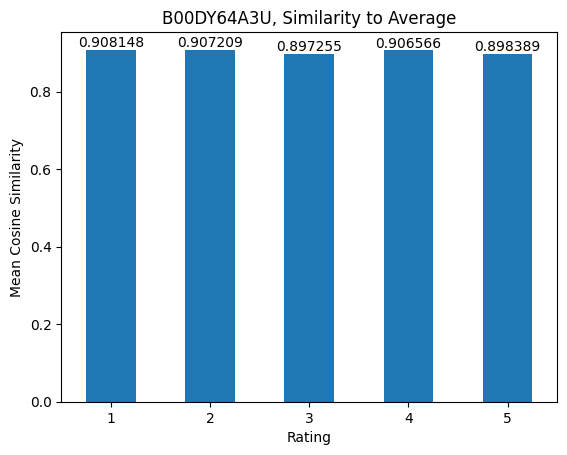

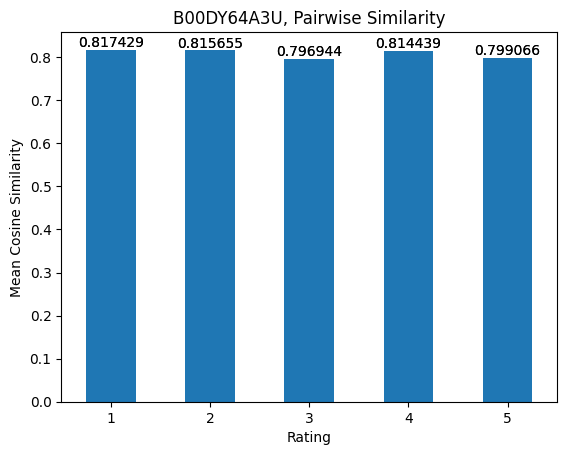

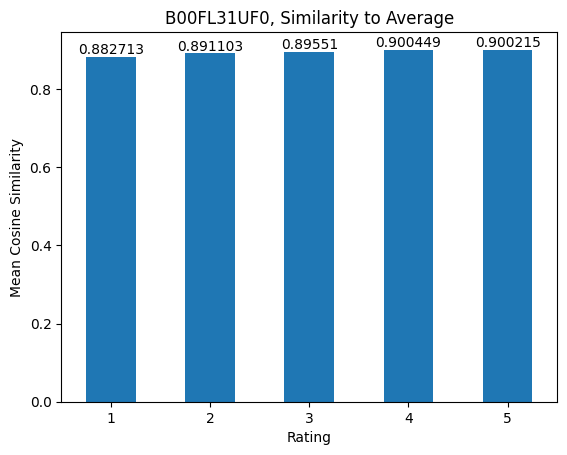

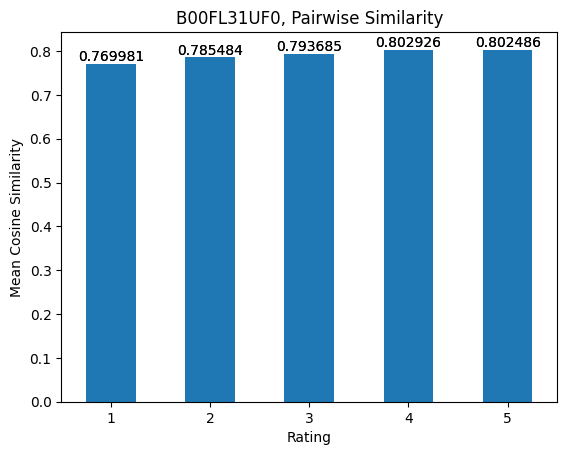

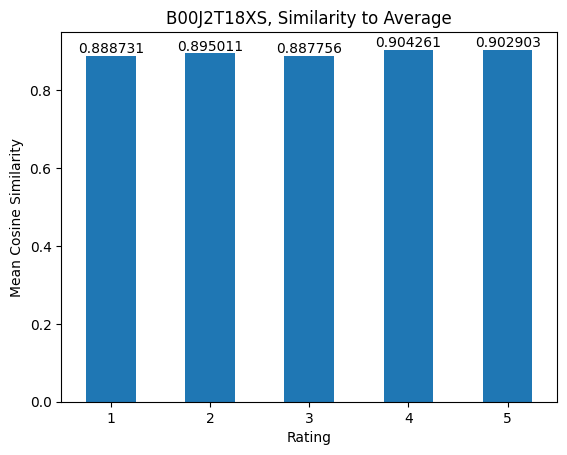

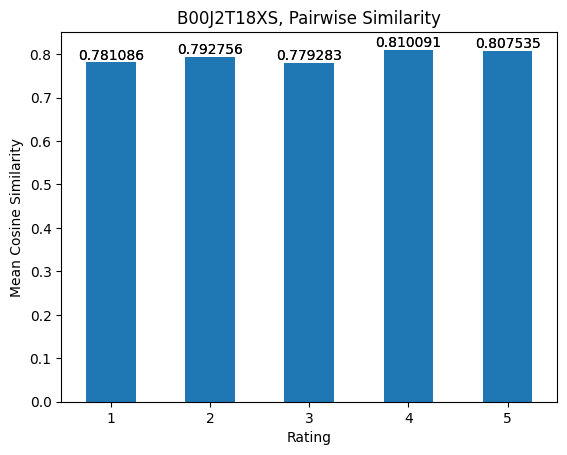

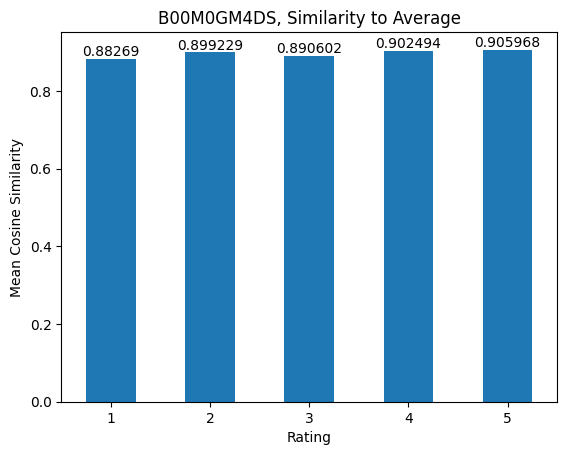

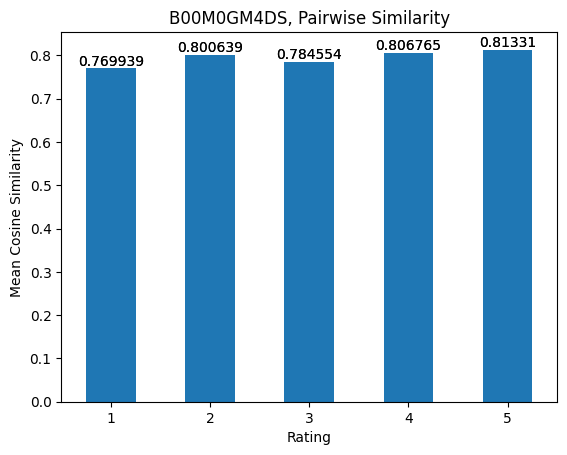

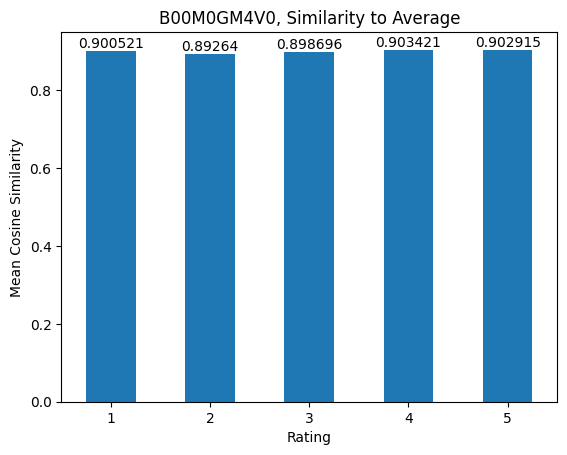

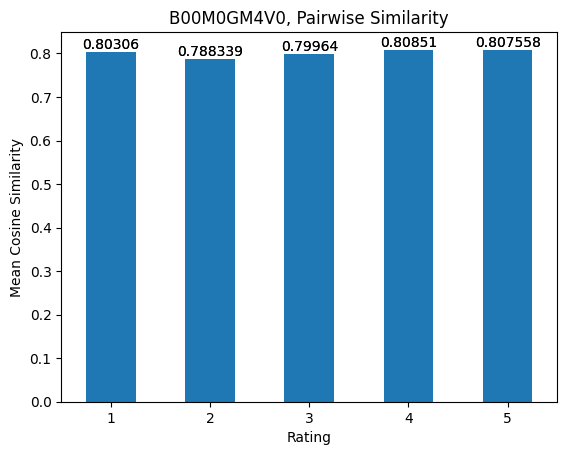

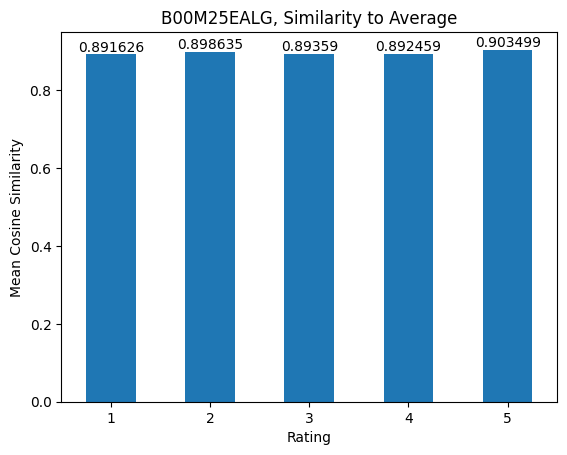

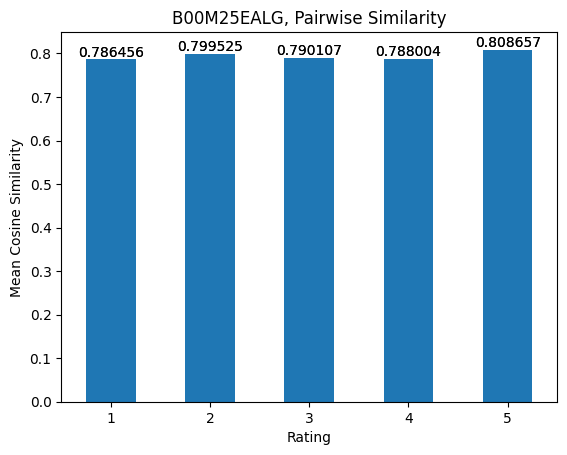

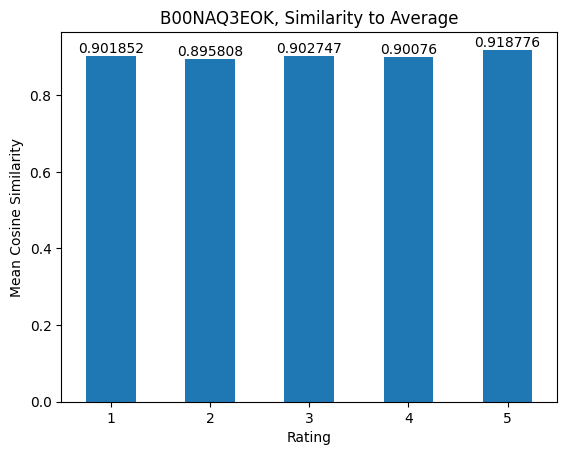

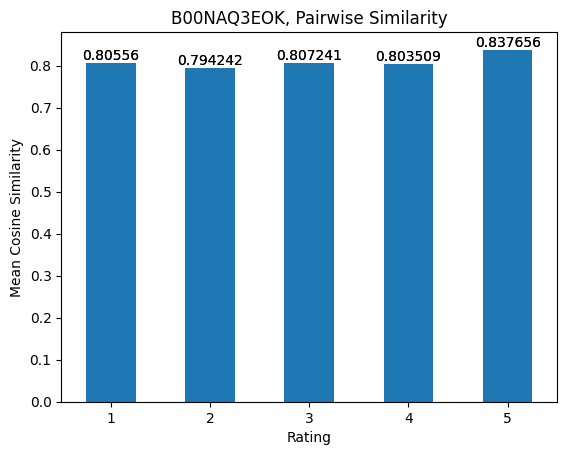

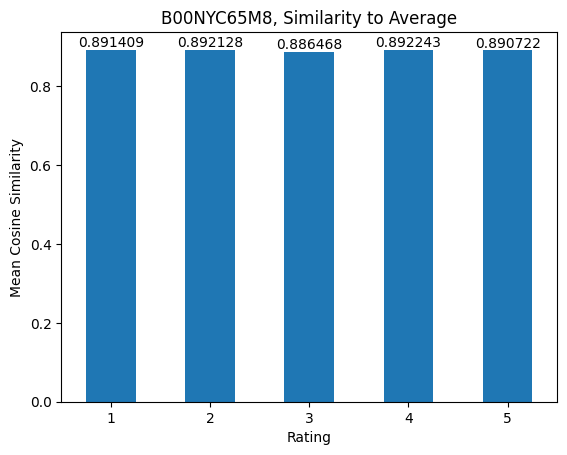

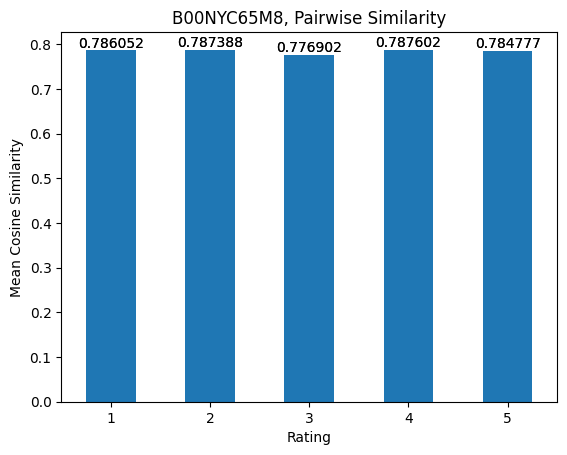

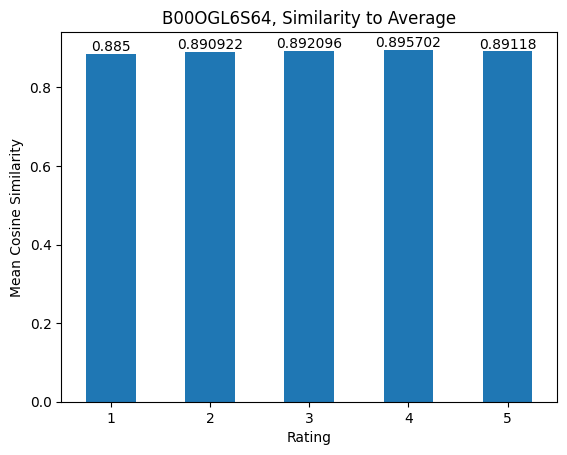

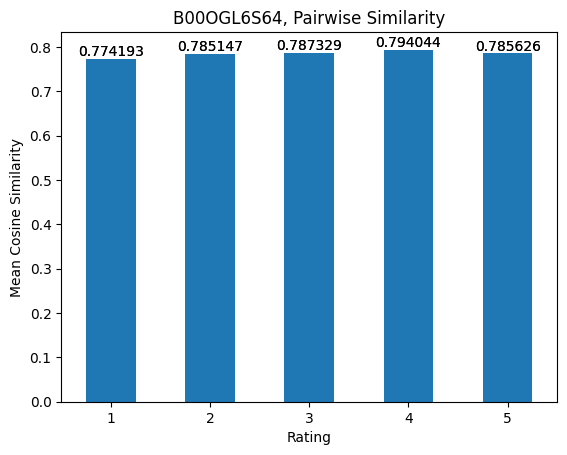

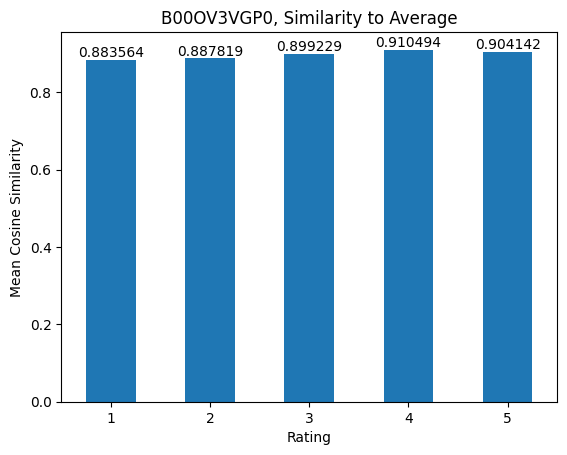

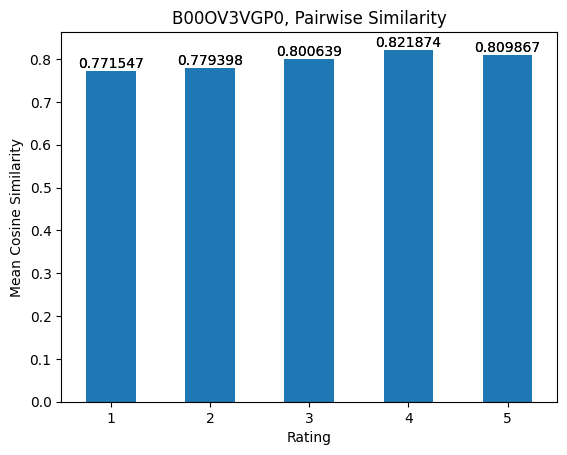

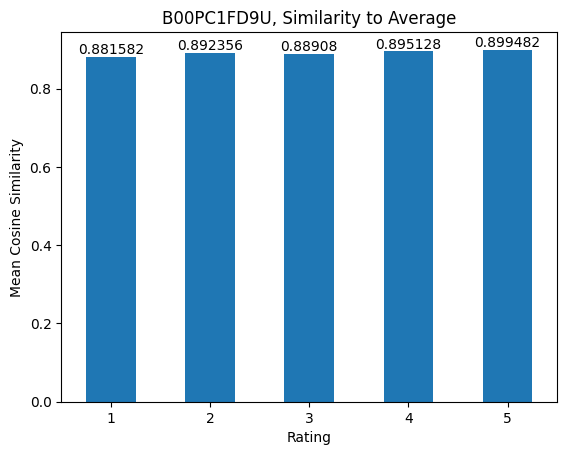

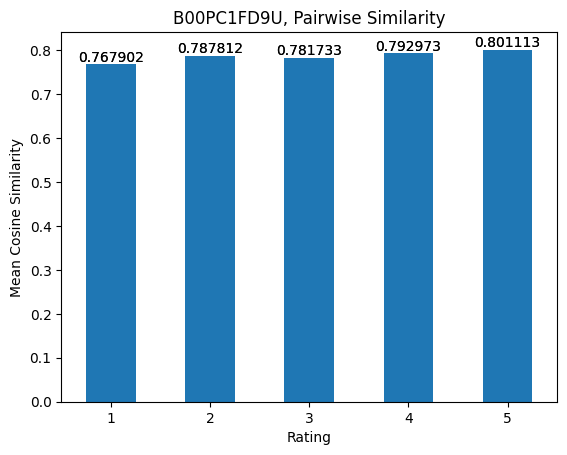

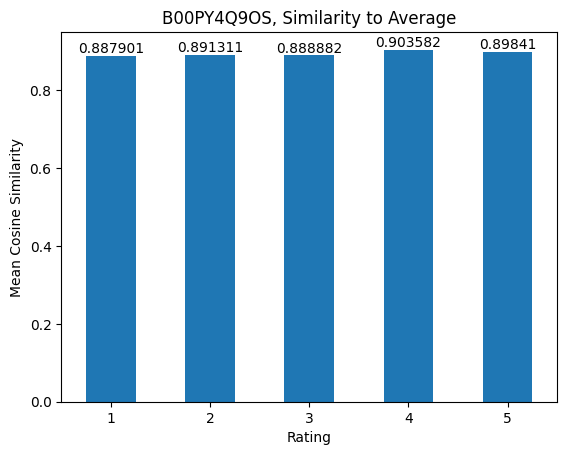

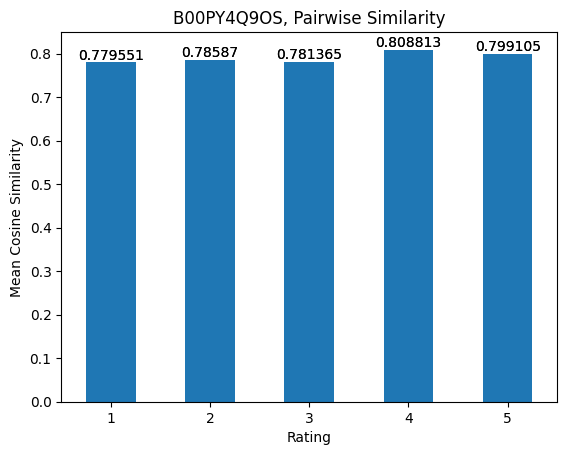

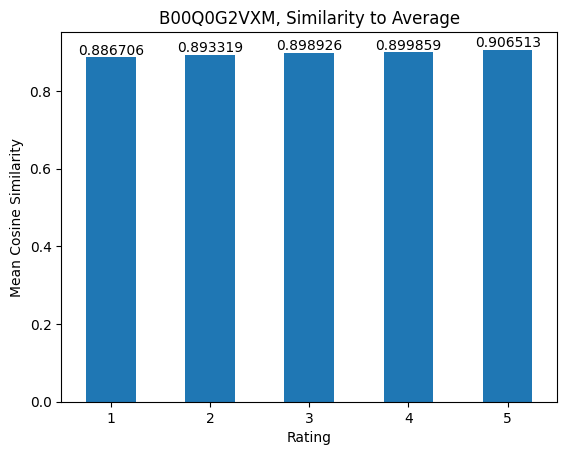

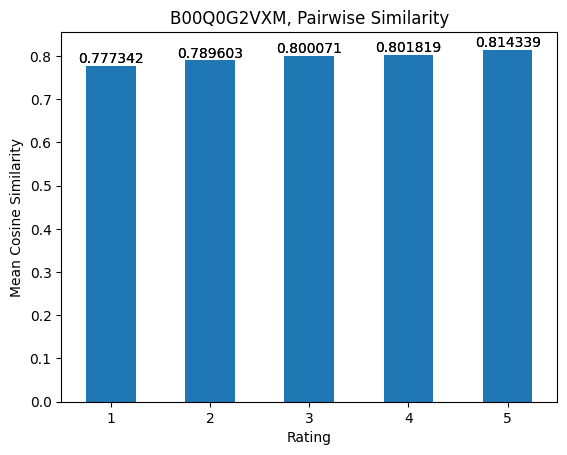

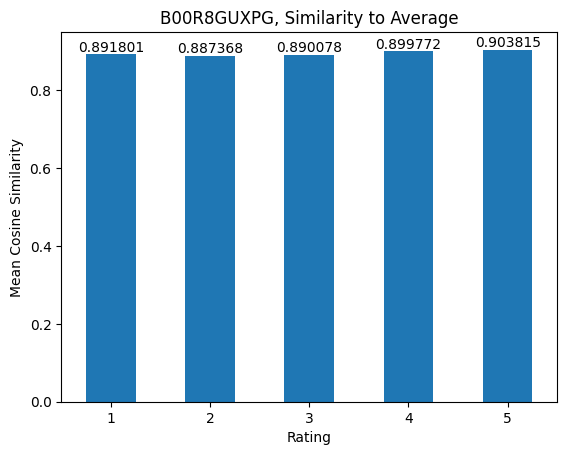

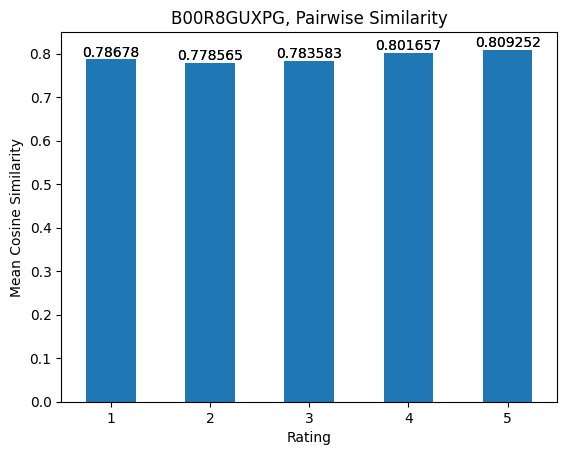

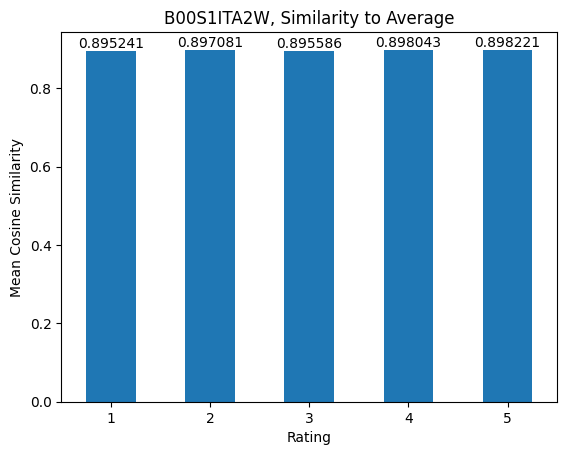

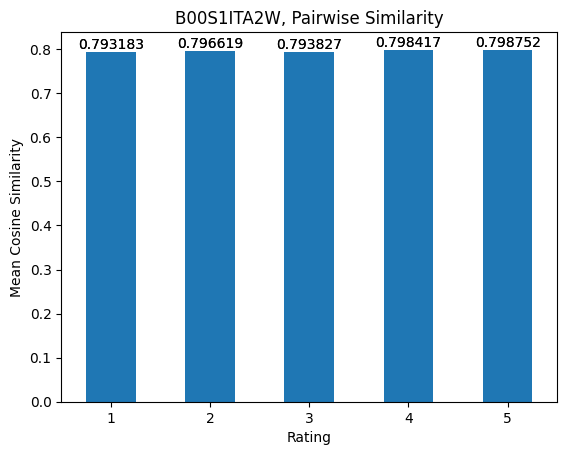

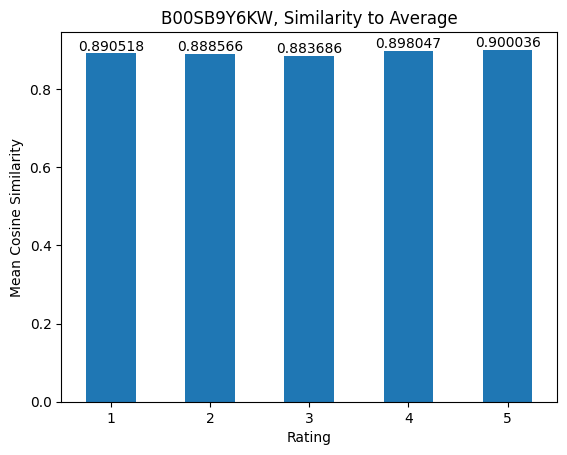

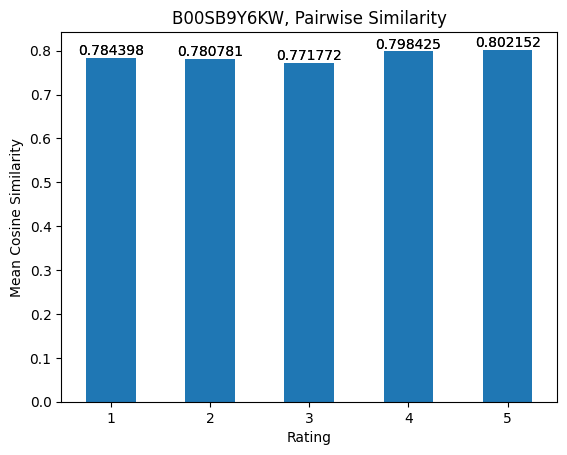

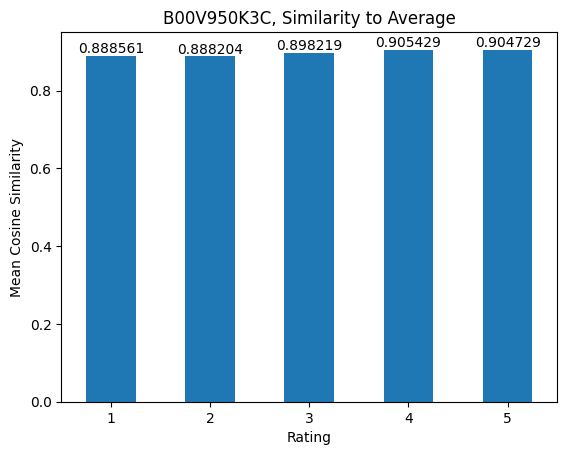

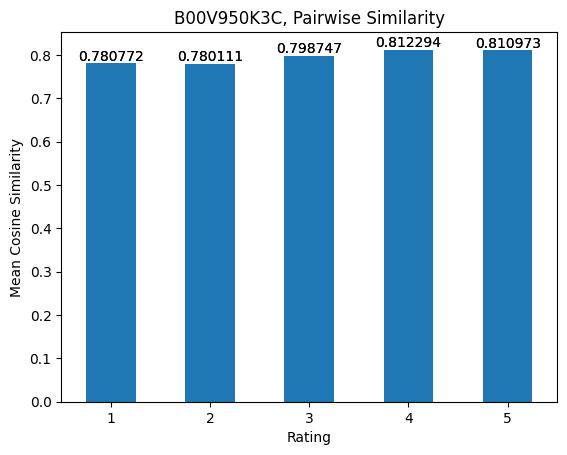

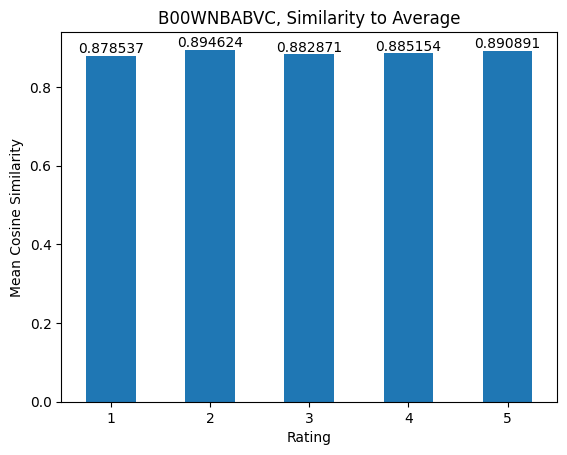

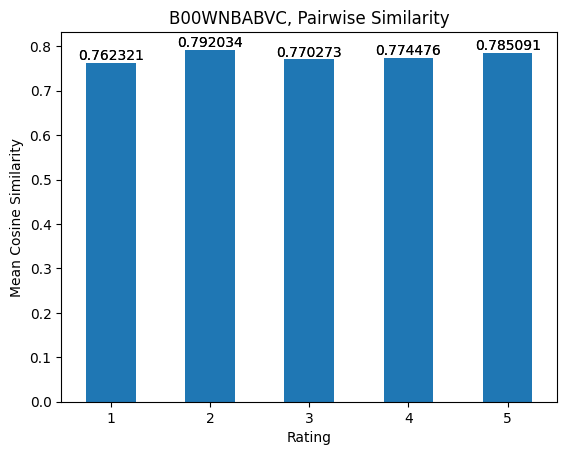

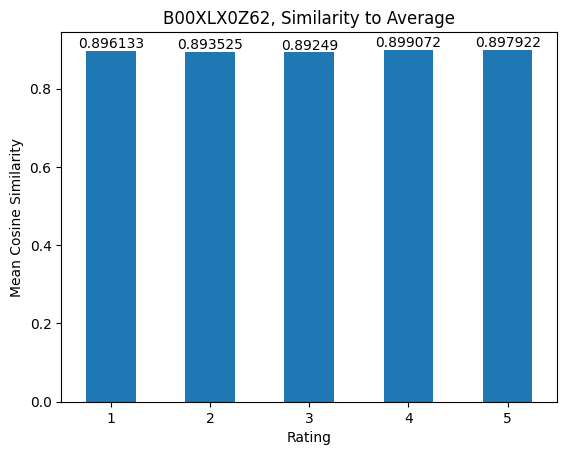

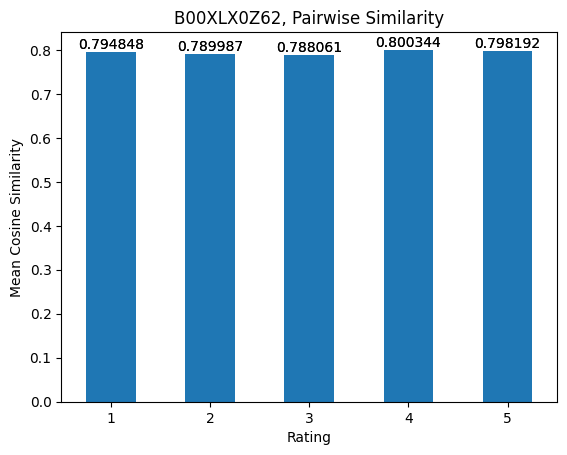

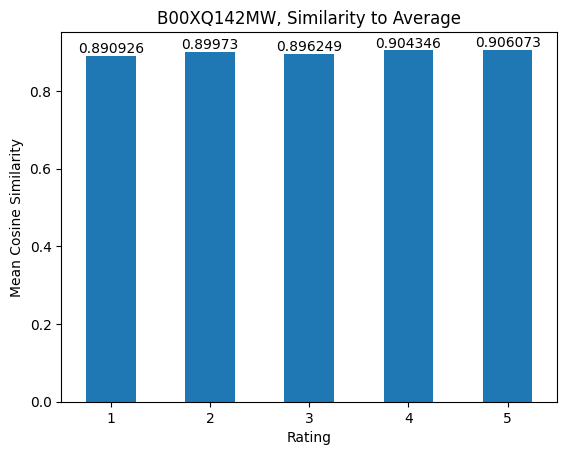

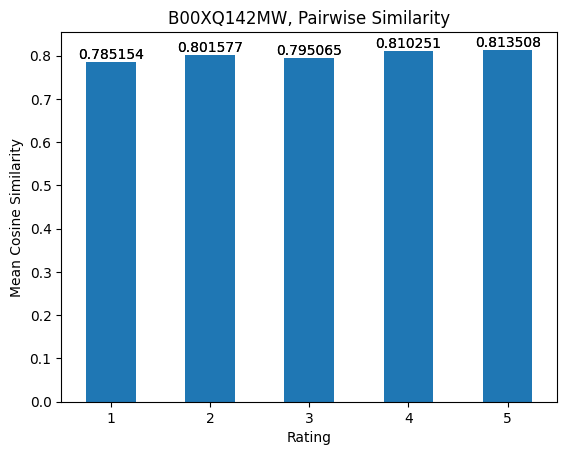

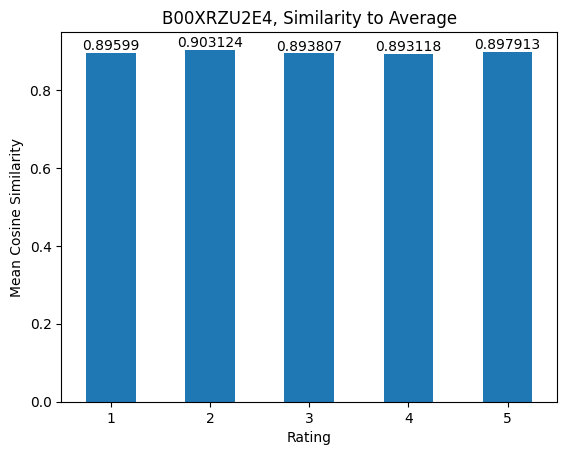

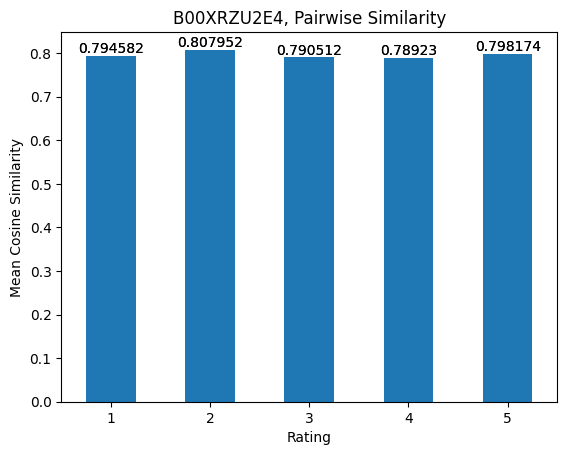

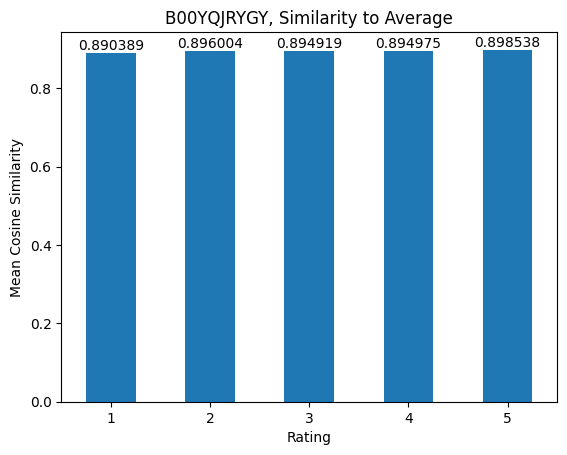

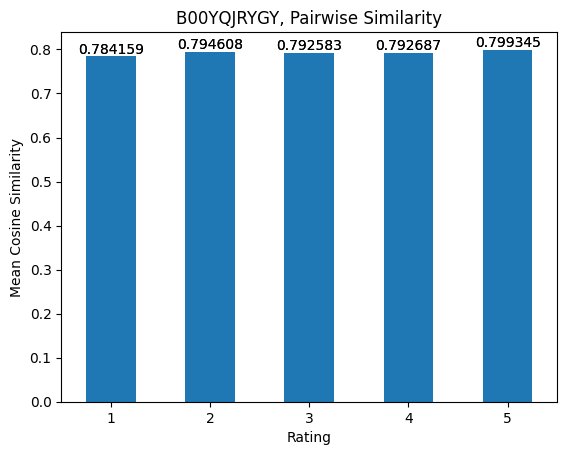

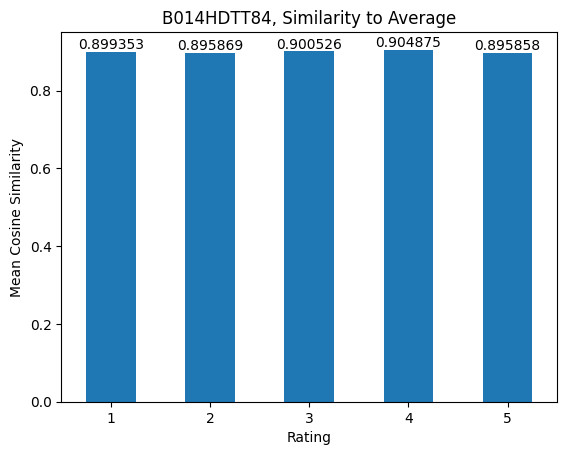

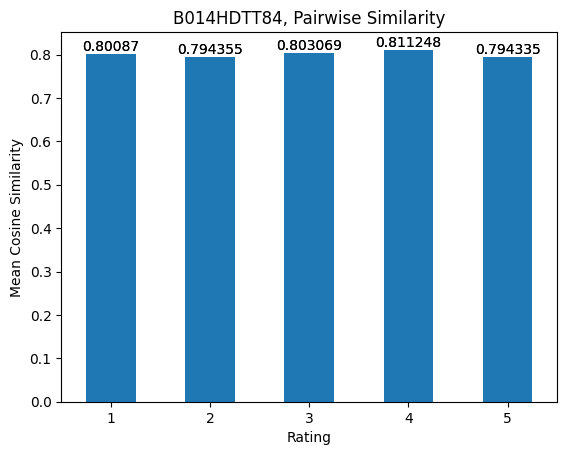

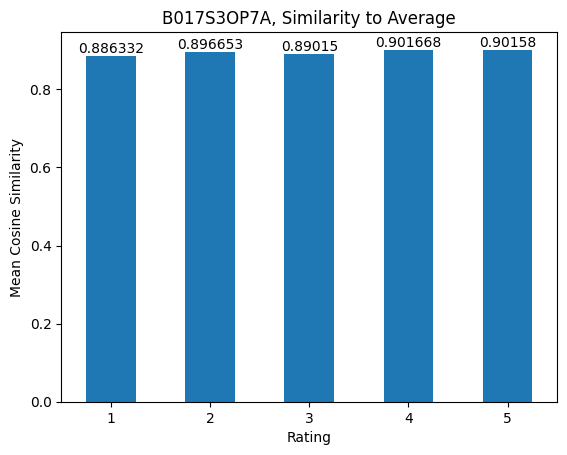

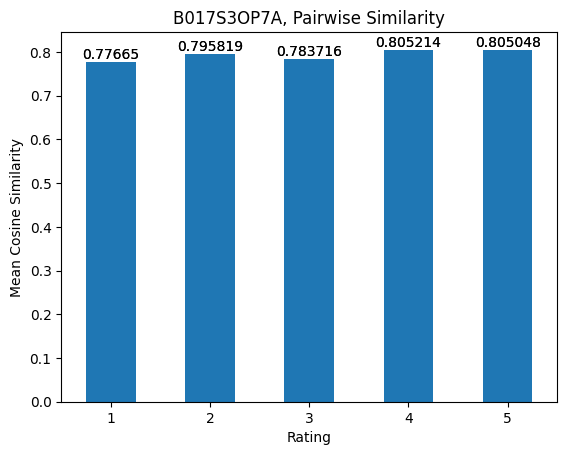

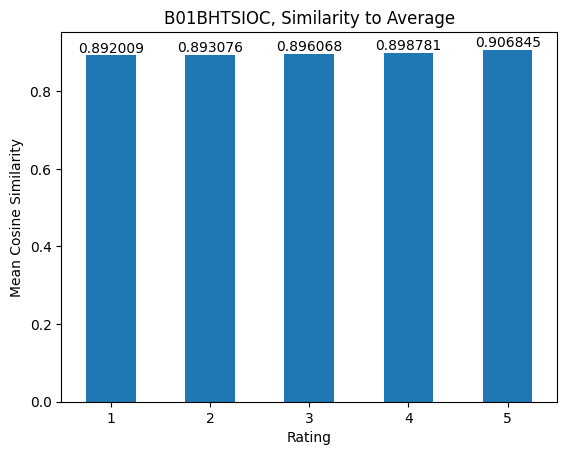

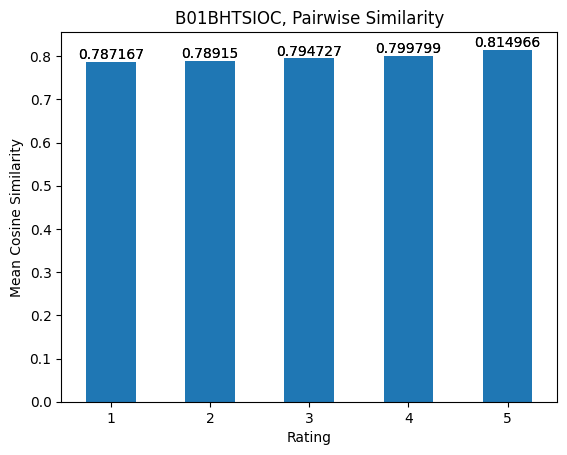

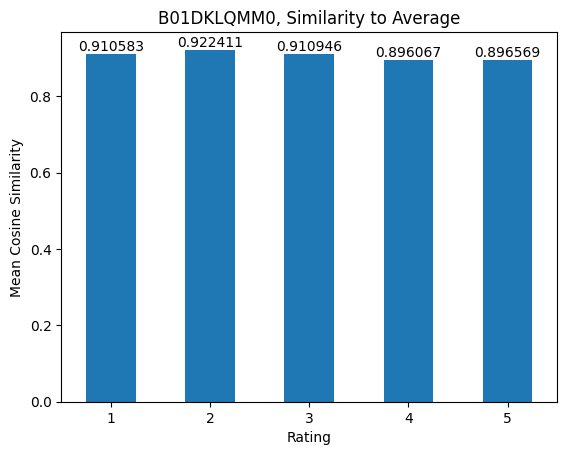

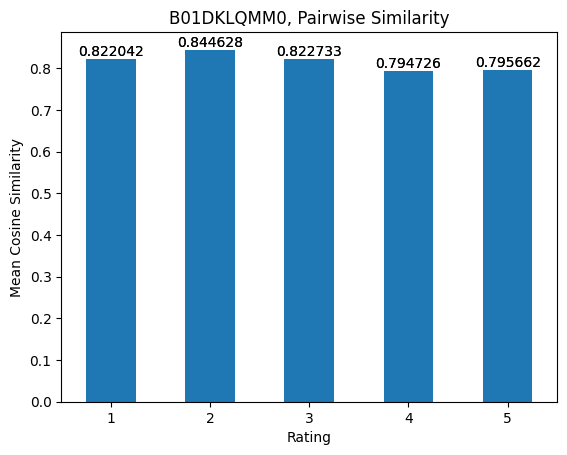

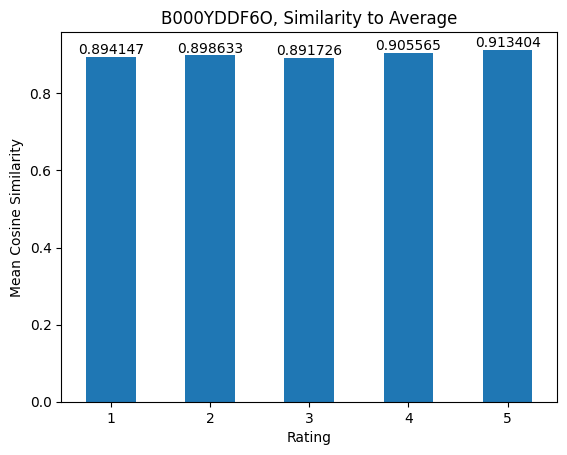

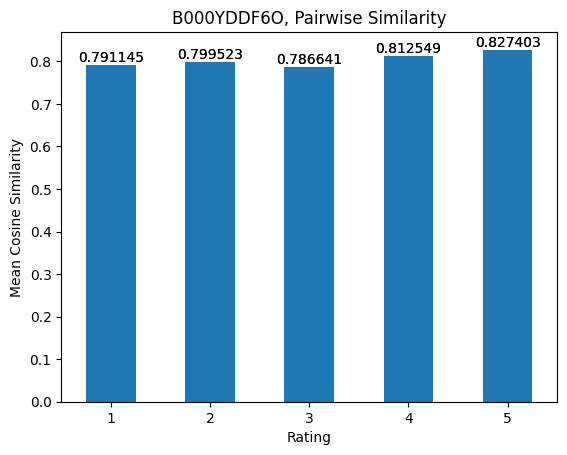

In [37]:
df = pd.read_pickle('experience_sampled_embeddings.pkl')

for asin in df['asin'].unique():
    simtoavg_rating_bar(df, asin)
    pairwisesim_rating_bar(df, asin)

In [61]:
def simtoavg_rating_csv(df, asin):
    
    row_dict = {}
    row_dict['asin'] = asin

    for r in 1.0, 2.0, 3.0, 4.0, 5.0:

        subset_df = df[(df['asin']==asin) & (df['overall']==r)]
        
        embeddings = subset_df['embedding'].apply(lambda x: np.array(x))
        embeddings = embeddings.to_numpy()
        average_embedding = np.mean(embeddings, axis=0)
        
        simtoavgs = []
        for e in embeddings:
            simtoavgs.append(cosine_similarity(e, average_embedding))
        
        key = str(r) + '_similarity'
        row_dict[key] = np.mean(simtoavgs)
        
    
    category = subset_df['category']
    row_dict['category'] = category.tolist()[0]
    
    return row_dict

In [65]:
def pairwise_rating_csv(df, asin):
    
    row_dict = {}
    row_dict['asin'] = asin

    for r in 1.0, 2.0, 3.0, 4.0, 5.0:

        subset_df = df[(df['asin']==asin) & (df['overall']==r)]
        
        embeddings = subset_df['embedding'].apply(lambda x: np.array(x))
        embeddings = embeddings.to_numpy()
        average_embedding = np.mean(embeddings, axis=0)
        
        pairs = list(itertools.combinations(embeddings, 2))

        pairsims = []
        for p in pairs:
            pairsims.append(cosine_similarity(p[0], p[1]))
        
        key = str(r) + '_similarity'
        row_dict[key] = np.mean(pairsims)
        
    
    category = subset_df['category']
    row_dict['category'] = category.tolist()[0]
    
    return row_dict

In [67]:
df = pd.read_pickle('experience_sampled_embeddings.pkl')

data = []
for asin in df['asin'].unique():
    data.append(pairwise_rating_csv(df, asin))
outdf = df = pd.DataFrame(data)

outdf.to_csv('experience_pairwise_data.csv')


In [11]:
df = pd.read_pickle('experience_sampled_embeddings.pkl')

df[df['overall']==5]['reviewText'].to_csv('experience_5star_reviewtext.csv')

In [12]:
df[df['overall']==1]['reviewText'].to_csv('experience_1star_reviewtext.csv')